# Major Power Outages Data Exploration Part
This part of the project focus on exploring features of the dataset with exploratory data analysis. It aims to understand the components of the dataset, the missingness situation of variables, as well as correlationship between columns.

The dataset of `outages.xlsx` contains major power outage data in the continental U.S. from January 2000 to July 2016. Here, a major power  outage is defined as a power outage that impacted at least 50,000 customers or caused an unplanned firm load loss of atleast 300MW. The data is downloadable from [this link](https://engineering.purdue.edu/LASCI/research-data/outages/outagerisks). The dictionary of this dataset is provided at this [article](https://www.sciencedirect.com/science/article/pii/S2352340918307182) under *Table 1. Variable descriptions*.

# Summary of Findings

### Introduction
The main focus of most of my investigations falls on the relationship between the severity of outages and some sociology information. I use two variables `OUTAGE.DURATION` and `CUSTOMERS.AFFECTED` to define *severity*, and investigate on how workers are recording these information and how their working manners may vary in terms of other factors.

### Cleaning and EDA
* I locate the missingness in this data set, changing the data frame to a reader-friendly format and assign them suitable data types.
* I discover that workers prefer to estimate the outage duration using whole numbers such as 1 hour. That makes the distribution of this variable unsmooth.
* I understand that different cause category have significantly different severity as to workers or customers. Some of the outages are terrible because workers need to spend a long time fixing the problem, while others may affect a huge amount of customers at the same time.

### Assessment of Missingness
* I find the variables in this data set really connected that many of them provides some evidences to the missingness of others. The only variable whos missingness can possibly be explained as NMAR is the variable about time durations.
* The missingness of the variable `CUSTOMERS.AFFECTED` may be related to many other variables, from geospatial indicators to humanity variables.

### Hypothesis Test
* If we look at all the data points in these records, we may conclude that companies treat communities who pay higher prices equally with those who pay less. (I observe the service quality in terms of their average respond time to an outage.)
* However, if we remove the cause type of "fuel supply emergency", which is heavily biased towards the higher pay rate group, we will find the real situation: companies actually respond to an outage in higher pay rate communities faster than the other!

# Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import datetime
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Cleaning and EDA

**Load and preview the data set**

Load the data for a preview from excel file `outage.xlsx`. Remove the file header, irrelevant row and column designed for unit demonstration.

In [2]:
excel_content = pd.read_excel("outage.xlsx", skiprows=5) # Remove the file header in the excel file provided
outage = excel_content.iloc[1:, 1:] # Remove irrelevant column and row designed for unit of variables
outage.head()

,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,OUTAGE.START.DATE,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
1,1.0,2011.0,7.0,Minnesota,MN,MRO,East North Central,-0.3,normal,2011-07-01 00:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874
2,2.0,2014.0,5.0,Minnesota,MN,MRO,East North Central,-0.1,normal,2014-05-11 00:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874
3,3.0,2010.0,10.0,Minnesota,MN,MRO,East North Central,-1.5,cold,2010-10-26 00:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874
4,4.0,2012.0,6.0,Minnesota,MN,MRO,East North Central,-0.1,normal,2012-06-19 00:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874
5,5.0,2015.0,7.0,Minnesota,MN,MRO,East North Central,1.2,warm,2015-07-18 00:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874


**Cast each column to the most appropriate data type**

**Notice:** integral column with missing values can only be casted as `float`. So, a test for missingness in each column is required before type casting.

In [3]:
outage.isnull().mean()

OBS                        0.000000
YEAR                       0.000000
MONTH                      0.005867
U.S._STATE                 0.000000
POSTAL.CODE                0.000000
NERC.REGION                0.000000
CLIMATE.REGION             0.003911
ANOMALY.LEVEL              0.005867
CLIMATE.CATEGORY           0.005867
OUTAGE.START.DATE          0.005867
OUTAGE.START.TIME          0.005867
OUTAGE.RESTORATION.DATE    0.037810
OUTAGE.RESTORATION.TIME    0.037810
CAUSE.CATEGORY             0.000000
CAUSE.CATEGORY.DETAIL      0.307040
HURRICANE.NAMES            0.953064
OUTAGE.DURATION            0.037810
DEMAND.LOSS.MW             0.459583
CUSTOMERS.AFFECTED         0.288787
RES.PRICE                  0.014342
COM.PRICE                  0.014342
IND.PRICE                  0.014342
TOTAL.PRICE                0.014342
RES.SALES                  0.014342
COM.SALES                  0.014342
IND.SALES                  0.014342
TOTAL.SALES                0.014342
RES.PERCEN                 0

In [4]:
 # Assign data types for each variable
dtype_dict = {"OBS": int, "YEAR": int, "MONTH": float, "U.S._STATE": str, "POSTAL.CODE": str, "NERC.REGION": str, 
              "CLIMATE.REGION": str, "ANOMALY.LEVEL": float, "CLIMATE.CATEGORY": str, "CAUSE.CATEGORY": str, 
              "CAUSE.CATEGORY.DETAIL": str, "HURRICANE.NAMES": str, "OUTAGE.DURATION": float, 
              "DEMAND.LOSS.MW": float, "CUSTOMERS.AFFECTED": float, "RES.PRICE": float, "COM.PRICE": float, 
              "IND.PRICE": float, "TOTAL.PRICE": float, "RES.SALES": float, "COM.SALES": float, "IND.SALES": float, 
              "TOTAL.SALES": float, "RES.PERCEN": float, "COM.PERCEN": float, "IND.PERCEN": float, 
              "RES.CUSTOMERS": int, "COM.CUSTOMERS": int, "IND.CUSTOMERS": int, "TOTAL.CUSTOMERS": int, 
              "RES.CUST.PCT": float, "COM.CUST.PCT": float, "IND.CUST.PCT": float, "PC.REALGSP.STATE": int, 
              "PC.REALGSP.USA": int, "PC.REALGSP.REL": float, "PC.REALGSP.CHANGE": float, "UTIL.REALGSP": int, 
              "TOTAL.REALGSP": int, "UTIL.CONTRI": float, "PI.UTIL.OFUSA": float, "POPULATION": int,
              "POPPCT_URBAN": float, "POPPCT_UC": float, "POPDEN_URBAN": int, "POPDEN_UC": float, "POPDEN_RURAL": float, 
              "AREAPCT_URBAN": float, "AREAPCT_UC": float,  "PCT_LAND": float, "PCT_WATER_TOT": float, "PCT_WATER_INLAND": float}

outage = outage.astype(dtype_dict).replace("nan", np.nan) # Cast the data frame as designed
outage.head()

,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,OUTAGE.START.DATE,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
1,1,2011,7.0,Minnesota,MN,MRO,East North Central,-0.3,normal,2011-07-01 00:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
2,2,2014,5.0,Minnesota,MN,MRO,East North Central,-0.1,normal,2014-05-11 00:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
3,3,2010,10.0,Minnesota,MN,MRO,East North Central,-1.5,cold,2010-10-26 00:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
4,4,2012,6.0,Minnesota,MN,MRO,East North Central,-0.1,normal,2012-06-19 00:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
5,5,2015,7.0,Minnesota,MN,MRO,East North Central,1.2,warm,2015-07-18 00:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743


**Time manipulations for relevant columns**

Combine the date and time columns as a whole for `OUTAGE.START` and `OUTAGE.RESTORATION`. Change the type of column `OUTAGE.DURATION` from `int` to `timedelta`.

In [5]:
# This method combines datetime.date and datetime.time to a complete datetime object
def combine_date_time(df):
    if df.isnull().any():
        return np.nan
    else:
        return datetime.datetime.combine(df[0], df[1])

month_dict = {1: "JAN", 2: "FEB", 3: "MAR", 4: "APR", 5: "MAY", 6: "JUN", 7: "JUL", 8: "AUG", 9: "SEP", 10: "OCT", 11: "NOV", 12: "DEC"}
def assign_month(num):
    if num in month_dict.keys():
        return month_dict[num]
    else:
        return np.nan

In [6]:
outage = (
    outage
    .assign(
        **{"MONTH": outage["MONTH"].apply(assign_month),
           "OUTAGE.START.TIME": outage[["OUTAGE.START.DATE", "OUTAGE.START.TIME"]].apply(combine_date_time,axis=1),
           "OUTAGE.RESTORATION.TIME": outage[["OUTAGE.RESTORATION.DATE", "OUTAGE.RESTORATION.TIME"]].apply(combine_date_time,axis=1)
           })
    .rename(columns={"OUTAGE.START.TIME": "OUTAGE.START", "OUTAGE.RESTORATION.TIME": "OUTAGE.RESTORATION"})
    .drop(["OUTAGE.START.DATE", "OUTAGE.RESTORATION.DATE"], axis=1)
)
outage.head()

,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,OUTAGE.START,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
1,1,2011,JUL,Minnesota,MN,MRO,East North Central,-0.3,normal,2011-07-01 17:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
2,2,2014,MAY,Minnesota,MN,MRO,East North Central,-0.1,normal,2014-05-11 18:38:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
3,3,2010,OCT,Minnesota,MN,MRO,East North Central,-1.5,cold,2010-10-26 20:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
4,4,2012,JUN,Minnesota,MN,MRO,East North Central,-0.1,normal,2012-06-19 04:30:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
5,5,2015,JUL,Minnesota,MN,MRO,East North Central,1.2,warm,2015-07-18 02:00:00,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743


 **Univariate Analysis**

Analyze the distribution of `OUTAGE.RESTORATION`.

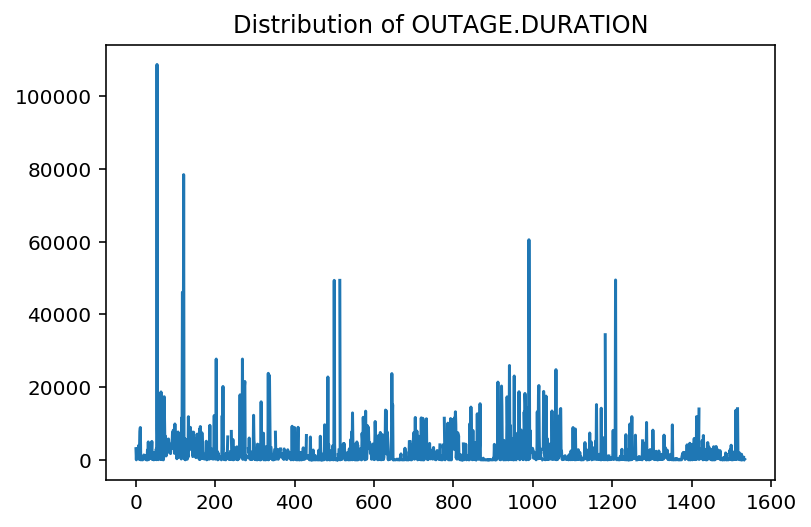

In [7]:
outage["OUTAGE.DURATION"].plot(kind="line", title="Distribution of OUTAGE.DURATION")

Notice that there are several peak values in the plot above. Since this variable is about time duration, these peak values become suspicious. We further analyze the abnormal peak values with `.value_counts()` function.

In [8]:
duration_distr = outage["OUTAGE.DURATION"].value_counts()
duration_distr

1.0       97
0.0       78
2880.0    15
60.0      14
300.0     14
          ..
1072.0     1
324.0      1
166.0      1
234.0      1
1414.0     1
Name: OUTAGE.DURATION, Length: 852, dtype: int64

In [9]:
pd.to_timedelta(duration_distr.head(10).index, unit="minute")

TimedeltaIndex(['0 days 00:01:00', '0 days 00:00:00', '2 days 00:00:00',
                '0 days 01:00:00', '0 days 05:00:00', '1 days 00:00:00',
                '3 days 00:00:00', '0 days 00:05:00', '0 days 07:00:00',
                '0 days 00:15:00'],
               dtype='timedelta64[ns]', freq=None)

**Findings:** As we can tell from the top 10 most frequent outage durations, the records are usually rounded to a general level (like x days or x hours). That makes each peak value representing all the actual outage durations in a range close to it.

**Bivariate Analysis**

Investigate the severity of different `CAUSE.CATEGORY`. With all the varaibles provided, the severity of an outage can be characterized by both `OUTAGE.DURATION` and `CUSTOMERS.AFFECTED`. Use `mean` of the grouped data to plot on the scatter graph.

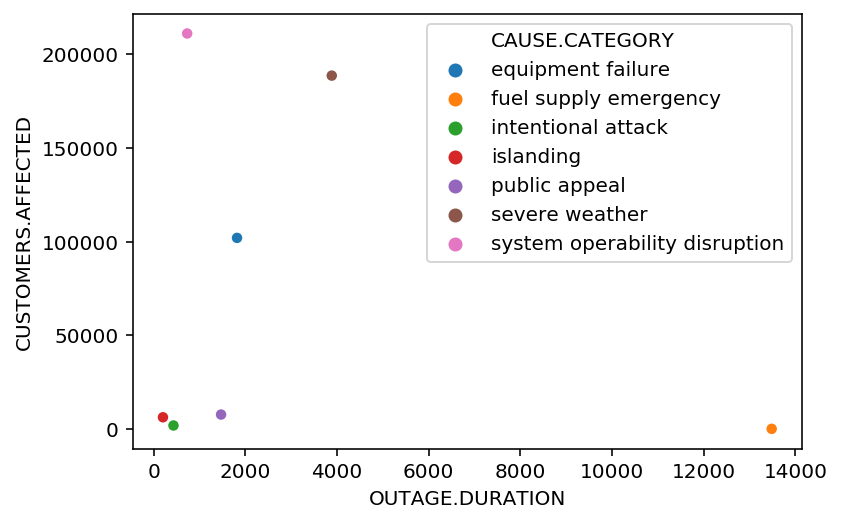

In [10]:
category_duration = outage.groupby("CAUSE.CATEGORY").mean()[["OUTAGE.DURATION", "CUSTOMERS.AFFECTED"]].reset_index()
sns.scatterplot(data=category_duration, x='OUTAGE.DURATION', y='CUSTOMERS.AFFECTED', hue="CAUSE.CATEGORY")

**Conclusion:** 

As observed from the graph, we can have a rough estimation that an outage caused by `islanding`, `intentional attack`, or `public appeal` tends to have a low severity in terms of both duration and number of people affected.

An outage of `fuel supply emergency`is significant for its long duration but it affects few people.

On the other hand, `equipment failure`, `severe weather` and `system operability disruption` are the causes of outage that impact tons of people.

### Assessment of Missingness

**NMAR Assumption**

Many columns in the `outage` dataset have missing values. However, I find most of the missingnesses have a better explanation other than NMAR.

Though, a variable that can be explained by NMAR is `OUTAGE.RESTORATION`(aka the combination of `OUTAGE.RSTORATION.DATE` and `OUTAGE.RESTORATION.TIME`). The reason for this missingness might be:
* The time at which the outage is fixed is unusual. For example, the job is done at night or during holidays so that the worker responsible for recording the time is not presenting.
* It takes weeks or months to fix a problem, and they can no longer find the record corresponding to this report.

Unfortunately, I don't think we can add more information to turn the missingness of `OUTAGE.RESTORATION` from NMAR to MAR.

**MAR Analysis**

The column `CUSTOMERS.AFFECTED` has a non-trivial proportion of missingness and it is not intuitively clear which other variables may affect the missingness of `CUSTOMERS.AFFECTED`. So, I decided to perform a permutation test on `CUSTOMERS.AFFECTED` and a few selected columns to see if they are related to each other. For column with descrete values (basically non-quantitative ones), we apply tvd-test statistic; for continuous quantitative variables, we apply ks-test statistic. The threshold `p-value` is set to 0.05.

Variables of interest:

In [11]:
descrete_column_lst = ["MONTH", "POSTAL.CODE", "CLIMATE.REGION", "CLIMATE.CATEGORY", "CAUSE.CATEGORY"]
continuous_column_lst = ["ANOMALY.LEVEL", "TOTAL.PRICE", "TOTAL.SALES", "TOTAL.CUSTOMERS", "POPPCT_URBAN", "POPDEN_URBAN"]

Helper method to permute the `CUSTOMERS.AFFECTED` column:

In [12]:
def permute_customers_affected(df):
    return df.assign(**{"CUSTOMERS.AFFECTED": df["CUSTOMERS.AFFECTED"].sample(replace=False, frac=1).reset_index(drop=True)})

tvd test part:

In [13]:
def tvd_stat(df):
    variable_name = df.columns[1]
    pt = df.assign(ISNULL=df["CUSTOMERS.AFFECTED"].isnull()).pivot_table(index=["ISNULL"], columns=[variable_name], aggfunc="size")
    return abs(pt.apply(lambda x: x / x.sum(), axis=1).diff()).sum().sum() / 2

In [14]:
num_perm = 500
for column in descrete_column_lst:
    subtbl = outage[["CUSTOMERS.AFFECTED", column]]
    real_stat = tvd_stat(subtbl)
    test_stat = []
    for _ in range(num_perm):
        test_stat.append(tvd_stat(permute_customers_affected(subtbl)))
    print(column, ": p-value = ", (test_stat >= real_stat).mean())

MONTH : p-value =  0.0
POSTAL.CODE : p-value =  0.0
CLIMATE.REGION : p-value =  0.0
CLIMATE.CATEGORY : p-value =  0.362
CAUSE.CATEGORY : p-value =  0.0


ks test part:

In [15]:
from scipy.stats import ks_2samp
def ks_stat(df):
    variable_name = df.columns[1]
    gp1 = df.loc[df["CUSTOMERS.AFFECTED"].isnull(), variable_name]
    gp2 = df.loc[~df["CUSTOMERS.AFFECTED"].isnull(), variable_name]
    return ks_2samp(gp1, gp2).statistic

In [16]:
num_perm = 500
for column in continuous_column_lst:
    subtbl = outage[["CUSTOMERS.AFFECTED", column]]
    real_stat = ks_stat(subtbl)
    test_stat = []
    for _ in range(num_perm):
        test_stat.append(ks_stat(permute_customers_affected(subtbl)))
    print(column, ": p-value = ", (pd.Series(test_stat) >= real_stat).mean())

ANOMALY.LEVEL : p-value =  0.0
TOTAL.PRICE : p-value =  0.242
TOTAL.SALES : p-value =  0.0
TOTAL.CUSTOMERS : p-value =  0.0
POPPCT_URBAN : p-value =  0.0
POPDEN_URBAN : p-value =  0.0


**Conclusion:**

The test statistics shows that many variables may correlate with the missingness of `CUSTOMERS.AFFECTED`.

* Among them, `POSTAL.CODE`, `CLIMATE.REGION`, `ANOMALY.LEVEL` are geospatial data. This can be explained by the fact that different places have different standards of operation on recording the information of number of people affected. It is not statistically significant to say `CLIMATE.CATEGORY` is related to the missingess of `CUSTOMERS.AFFECTED` because we only see three categories available for this variable. It is very generalized so that geospatial differences can be balanced here.
* `TOTAL.CUSTOMERS`, `POPPCT_URBAN`, `POPDEN_URBAN` are data about humanities. Different number of customers as well as different percentage of urban populations are usually related to different service standard from the local department.
* different `MONTH` have different proportions of missingness. There may be some confounding factors about labor forces embedded in this relationship.

### Hypothesis Test

As noticed from the Missingness part, `TOTAL.PRICE` is a factor that may influence the missingness of `OUTAGE.DURATION`. I interpret the underlying reason as the different service standards between rich developed areas and poor less developed areas. In this sector, we further investigate the difference in outage restoring service between the developed and less developed.

We categorize all the observations into two parts, the "higher pay rate part" and the "lower pay rate part". The boundary is determined by the `median` of `TOTAL.PRICE` so that both groups have similar sample sizes. In theory, people in areas with higher pay rates should have a better service standard. That include a faster response to an outage. So, our hypotheses are defined as:
* H0: The mean outage duration of higher pay rate group is **roughly the same** as that of lower pay rate group.
* H1: The mean outage duration of higher pay rate group is **shorter** than that of lower pay rate group.

We use `difference of means` as the test statistic, and set the critical `p-value` as 0.05.

Assign group for each observation and slice the table as small as we can.

In [17]:
outage_higher_pay = outage.assign(HIGHER_PAY=outage["TOTAL.PRICE"] > outage["TOTAL.PRICE"].median())[["OUTAGE.DURATION", "HIGHER_PAY"]]
outage_higher_pay

,OUTAGE.DURATION,HIGHER_PAY
1,3060.0,False
2,1.0,False
3,3000.0,False
4,2550.0,False
5,1740.0,True
...,...,...
1530,720.0,False
1531,NaN,False
1532,59.0,False
1533,181.0,False


Perform the test by bootstrap the sub table:

In [18]:
def diff_of_means(df):
    means = df.groupby("HIGHER_PAY")["OUTAGE.DURATION"].mean()
    return means[False] - means[True]

In [19]:
real_stat = diff_of_means(outage_higher_pay)
test_stat = []
for _ in range(1000):
    resample = outage_higher_pay.assign(HIGHER_PAY=outage_higher_pay["HIGHER_PAY"].sample(replace=False, frac=1).reset_index(drop=True))
    test_stat.append(diff_of_means(resample))
print("p_val = ", (test_stat > real_stat).mean())

p_val =  0.479


**Conclusion:** This p-value shows that we failed to reject H0, so we would prefer to say the mean outage duration for the higher pay rate group is the same as the lower pay rate group.

### Revised Hypothesis Test

The result above is against our presumption and I want to figure out the reason why. Recalling the scatter plot of the severity of different types of outages in the previous part, I noticed that "fuel supply emergency" dominates the duration of the outages. Is it possible that our test statistic is affected by the fact that higher pay rate areas are using much more energy, hence creating most of the "fuel supply emergency" in our record?

In [20]:
# Invstigate the proportion of fuel supply emergency in higher pay rate areas
(
    outage
    .assign(HIGHER_PAY=outage["TOTAL.PRICE"] > outage["TOTAL.PRICE"].median())
    .loc[outage["CAUSE.CATEGORY"] == "fuel supply emergency"]
    ["HIGHER_PAY"]
    .mean()
)

0.7450980392156863

It turns out that around three quarters of the fuel supply emergency outages happened in the higher pay rate areas. This may largely increase the general mean value we calculated for this group, and it cannot reveal the true situation of the average respond time in other categories. So, I decided to romove this part of the data from the data set, and try the same hypothesis test again.

* H0: The mean outage duration (without fuel supply emergency outages) of higher pay rate group is **roughly the same** as that of lower pay rate group.
* H1: The mean outage duration (without fuel supply emergency outages) of higher pay rate group is **shorter** than that of lower pay rate group.

We still use `difference of means` as the test statistic, and set the critical `p-value` as 0.05.

In [21]:
outage_higher_pay_revised = (
    outage
    .assign(HIGHER_PAY=outage["TOTAL.PRICE"] > outage["TOTAL.PRICE"].median())
    .loc[outage["CAUSE.CATEGORY"] != "fuel supply emergency"]
    [["OUTAGE.DURATION", "HIGHER_PAY"]]
)
outage_higher_pay_revised

,OUTAGE.DURATION,HIGHER_PAY
1,3060.0,False
2,1.0,False
3,3000.0,False
4,2550.0,False
5,1740.0,True
...,...,...
1529,220.0,False
1530,720.0,False
1532,59.0,False
1533,181.0,False


In [22]:
# Perform the bootstrap test again
real_stat = diff_of_means(outage_higher_pay_revised)
test_stat = []
for _ in range(1000):
    resample = (
        outage_higher_pay_revised
        .assign(HIGHER_PAY=outage_higher_pay_revised["HIGHER_PAY"].sample(replace=False, frac=1).reset_index(drop=True))
    )
    test_stat.append(diff_of_means(resample))
print("p_val(revised) = ", (test_stat > real_stat).mean())

p_val(revised) =  0.042


**Conclusion:** Now, after removing the outages due to fuel supply emergency, the difference between two groups is statistically significant for us to conclude that higher pay rate groups receives a faster respond time than lower pay rate groups in fixing outages.